# Make figures for paper on geometric images

## Authors:
- **David W. Hogg** (NYU) (MPIA) (Flatiron)
- **Soledad Villar** (JHU)

## To-do items and bugs:
- Plot filters in groups with subplots or equivalent (ie, not just one filter per plot).
- Figure out how to plot 2-tensor filters.
- Figure out which cases need to be plotted.
- Figure out a better way to plot in `D=3`.

In [4]:
import itertools as it
import numpy as np
import geometric as geom
import finufft
import pylab as plt
%load_ext autoreload
%autoreload 2

In [5]:
D = 2
group_operators = geom.make_all_operators(D)

In [6]:
geom.test_group(group_operators)

group is closed under multiplication
group operators are the transposes of their inverses


True

In [10]:
allfilters = {}
names = {}
maxn = {}
for M in [3, 5]:
    maxn[(D, M)] = 0
    klist = (0, 1, 2)
    if M > 3:
        klist = (0, 1)
    for k, parity in it.product(klist, (1, -1)):
        key = (D, M, k, parity)
        allfilters[key] = geom.get_unique_invariant_filters(M, k, parity, D, group_operators)
        n = len(allfilters[key])
        if n > maxn[(D, M)]:
            maxn[(D, M)] = n
        names[key] = ["{} {}".format(geom.ktensor.name(k, parity), i) for i in range(n)]

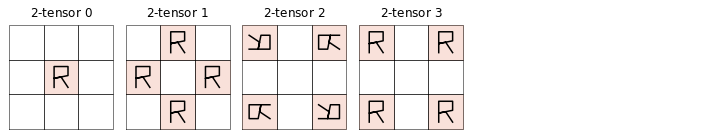

In [22]:
key = (2, 3, 2, 1)
fig = geom.plot_filters(allfilters[key], names[key], maxn[(D, M)])

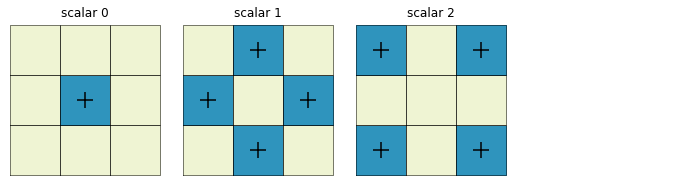

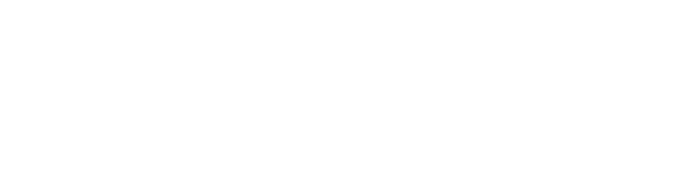

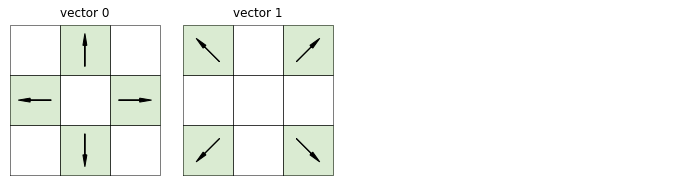

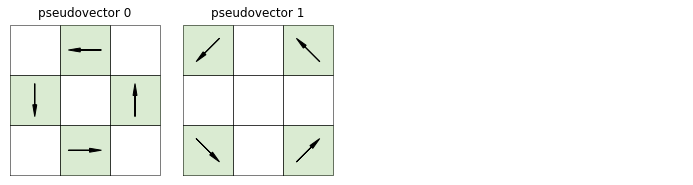

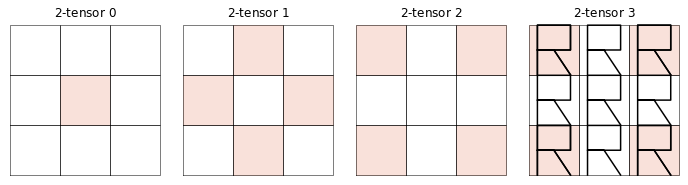

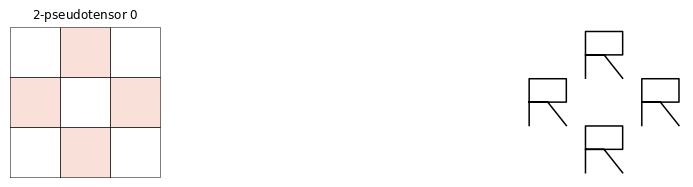

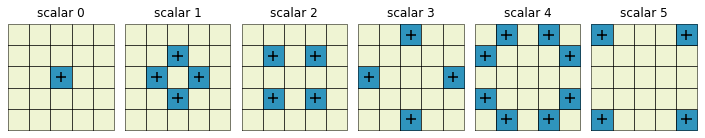

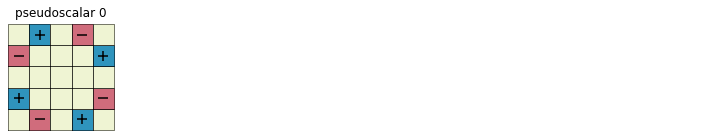

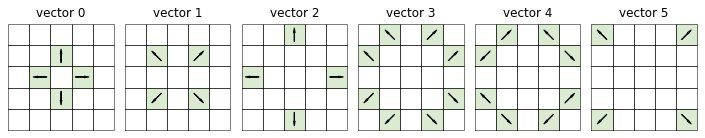

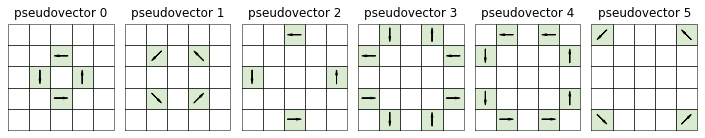

In [13]:
dpi = 300
paritysign = {1: "+", -1: "-"}
for key in allfilters.keys():
    D, M, k, parity = key
    fig = geom.plot_filters(allfilters[key], names[key], maxn[(D, M)])
    plotname = "filter{}{}_{}_{}.png".format(paritysign[parity], k, D, M)
    fig.savefig(plotname, dpi=dpi)

In [ ]:
# make a sensible smooth scalar image on a 2-torus
N = 16
D = 2
np.random.seed(42)
image = np.random.normal(size=D * (N, ))
foo = np.pi * np.arange(-1. + 1. / N, 1., 2. / N)
ys, xs = np.meshgrid(foo, foo) # ys, xs or xs, ys??
ft = finufft.nufft2d1(xs.flatten(), ys.flatten(), image.flatten().astype(complex), (6, 5))
package = finufft.nufft2d2(xs.flatten(), ys.flatten(), ft).reshape(N, N).real
package -= np.mean(package)
package /= np.sqrt(np.mean(package ** 2))
scalar_image = geom.geometric_image(package, 1, D)

In [ ]:
filters = [(allfilters[(D, 5, 0,  1)][4], r"C_{s}"),
           (allfilters[(D, 5, 0, -1)][0], r"C_{ps}"),
           (allfilters[(D, 3, 1,  1)][0], r"C_{v}"),
           (allfilters[(D, 3, 1, -1)][0], r"C_{pv}"),
          ]

In [ ]:
monomials = {}
monomials[1] = [(scalar_image.normalize(), r"s"), ]
monomials[1] += [(scalar_image.convolve_with(ff).normalize(),
                  r"s\ast " + tt) for ff, tt in filters]

In [ ]:
degree = 1
fig = geom.plot_images(monomials[degree])
fig.savefig("monomials_{}.png".format(degree), dpi=dpi)

In [ ]:
# next order!
monomials[2] = []
n = len(monomials[1])
for i in range(n):
    for j in range(i, n):
        image1, latex1 = monomials[1][i]
        image2, latex2 = monomials[1][j]
        monomials[2] += [((image1 * image2).normalize(),
                          "(" + latex1 + r")\otimes(" + latex2 + ")"),
                        ]
foo = []
for image, latex in monomials[2]:
    if image.k > 1:
        image = image.contract(0, 1).normalize()
        latex = r"\mathrm{Tr}[" + latex + "]"
    foo += [(image, latex), ]
monomials[2] = foo

In [ ]:
degree = 2
fig = geom.plot_images(monomials[degree])
fig.savefig("monomials_{}.png".format(degree), dpi=dpi)